In [107]:
import numpy as np
import pandas as pd
import ast
import seaborn as sns

import matplotlib.pyplot as plt

In [108]:
df = pd.read_csv("data_science_asia_clean.csv", index_col = 0)
df.head(5)

,Duration,What is your age (# years)?,What is your gender?,In which country do you currently reside?,Are you currently a student?,On which platforms have you begun or completed data science courses?,What products or platforms did you find to be most helpful when you first started studying data science?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,For how many years have you been writing code and/or programming?,What programming languages do you use on a regular basis?,Which of the following integrated development environments (IDE's) do you use on a regular basis?,Do you use any of the following hosted notebook products?,Do you use any of the following data visualization libraries on a regular basis?,For how many years have you used machine learning methods?,Which of the following machine learning frameworks do you use on a regular basis?,Which of the following ML algorithms do you use on a regular basis?,Do you download pre-trained model weights from any of the following services?,Who/what are your favorite media sources that report on data science topics?
1,470,55-59,Man,South Korea,No,('University Courses (resulting in a universit...,"('Kaggle (notebooks, competitions, etc)',)",Master’s degree,1-3 years,"('Python', 'SQL')","(' PyCharm ', ' Jupyter Notebook')","('None',)","(' Matplotlib ', ' Seaborn ')",1-2 years,"(' Scikit-learn ',)","('Linear or Logistic Regression', 'Decision Tr...","('No, I do not download pre-trained model weig...",NaN
2,174,25-29,Woman,China,Yes,"('Kaggle Learn Courses', 'University Courses (...","('University courses', 'Online courses (Course...",Master’s degree,< 1 years,"('Python', 'MATLAB')","(' Visual Studio ', ' MATLAB ', ' Jupyter Note...","('Colab Notebooks', 'Google Cloud Vertex AI Wo...",NaN,NaN,NaN,NaN,NaN,NaN
3,506,25-29,Man,Japan,No,"('Udemy',)","('Online courses (Coursera, EdX, etc)',)",Master’s degree,3-5 years,"('Python',)","(' Visual Studio Code (VSCode) ', ' Jupyter No...","(' Kaggle Notebooks', 'Colab Notebooks')","(' Seaborn ',)",2-3 years,"(' Scikit-learn ', ' PyTorch ', ' Xgboost ', ...","('Decision Trees or Random Forests', 'Dense Ne...","(' Huggingface Models ',)","('Kaggle (notebooks, forums, etc)',)"
4,283,22-24,Woman,China,Yes,('University Courses (resulting in a universit...,"('University courses', 'Social media platforms...",I prefer not to answer,< 1 years,"('Python', 'MATLAB', 'Other')","(' Visual Studio ', ' PyCharm ', ' MATLAB ')","('Google Cloud Vertex AI Workbench ',)","('None',)",Under 1 year,"(' TensorFlow ',)","('None',)","('Other storage services (i.e. google drive)',)","('Other',)"
5,492,40-44,Man,Japan,No,"('Kaggle Learn Courses',)","('Video platforms (YouTube, Twitch, etc)', 'Ka...",No formal education past high school,< 1 years,"('Python',)","(' Notepad++ ', ' Jupyter Notebook')","('None',)","('None',)",I do not use machine learning methods,NaN,NaN,NaN,"('Kaggle (notebooks, forums, etc)',)"


In [109]:
def convert_to_tuple(value):
    if pd.notna(value):
        return ast.literal_eval(value)
    else:
        return value
for col in df.columns:
    check_value = df[col].iloc[0]
    if (pd.isnull(check_value)):
        i = 1
        while(pd.isnull(check_value)):
            check_value = df[col].iloc[i]
            i += 1
    if isinstance(check_value, str):
        if(check_value[0] == '('):
            df[col] = df[col].apply(convert_to_tuple)

<h1>KHẢO SÁT VỀ DATA SCIENCE TẠI VIỆT NAM 2022</h1>

Lọc dữ liệu những người khảo sát tại Việt Nam

In [110]:
vn_df = df.loc[df['In which country do you currently reside?'] == 'Viet Nam' ]
vn_df.head()

,Duration,What is your age (# years)?,What is your gender?,In which country do you currently reside?,Are you currently a student?,On which platforms have you begun or completed data science courses?,What products or platforms did you find to be most helpful when you first started studying data science?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,For how many years have you been writing code and/or programming?,What programming languages do you use on a regular basis?,Which of the following integrated development environments (IDE's) do you use on a regular basis?,Do you use any of the following hosted notebook products?,Do you use any of the following data visualization libraries on a regular basis?,For how many years have you used machine learning methods?,Which of the following machine learning frameworks do you use on a regular basis?,Which of the following ML algorithms do you use on a regular basis?,Do you download pre-trained model weights from any of the following services?,Who/what are your favorite media sources that report on data science topics?
8,512,40-44,Man,Viet Nam,Yes,(Cloud-certification programs (direct from AWS...,"(University courses, Kaggle (notebooks, compet...",Doctoral degree,10-20 years,"(Python, SQL, C#, C++, Javascript, MATLAB)","(JupyterLab , Visual Studio , Visual Studio ...","( Kaggle Notebooks, Colab Notebooks, Azure Not...","( Matplotlib , Ggplot / ggplot2 , Geoplotlib...",5-10 years,"( Scikit-learn , TensorFlow , Keras , PyT...","(Linear or Logistic Regression, Decision Trees...","( TensorFlow Hub , PyTorch Hub , NVIDIA NGC...","(Kaggle (notebooks, forums, etc), Course Forum..."
9,380,18-21,Man,Viet Nam,Yes,"(None,)","(University courses, Online courses (Coursera,...",Some college/university study without earning ...,< 1 years,"(Python, SQL)","( Visual Studio Code (VSCode) , PyCharm , Ju...","(None,)","( Matplotlib , Seaborn )",I do not use machine learning methods,NaN,NaN,NaN,"(Kaggle (notebooks, forums, etc), YouTube (Kag..."
26,174,22-24,Woman,Viet Nam,Yes,"(LinkedIn Learning,)","(Online courses (Coursera, EdX, etc),)",Bachelor’s degree,I have never written code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(Email newsletters (Data Elixir, O'Reilly Data..."
32,505,22-24,Man,Viet Nam,No,"(Coursera, Kaggle Learn Courses, Fast.ai, Udac...","(Online courses (Coursera, EdX, etc), Video pl...",Bachelor’s degree,1-3 years,"(Python,)","(JupyterLab , Visual Studio Code (VSCode) , ...","( Kaggle Notebooks, Amazon Sagemaker Studio L...","( Matplotlib , Ggplot / ggplot2 )",Under 1 year,"( Scikit-learn , TensorFlow , Keras , PyT...","(Decision Trees or Random Forests, Gradient Bo...","( TensorFlow Hub ,)","(Twitter (data science influencers), Reddit (r..."
35,1163,18-21,Man,Viet Nam,Yes,"(None,)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
count = vn_df.count()[1]

<h3>1. Khảo sát về nền tảng người khảo sát tại Việt Nam cảm thấy hữu ích nhất khi mới bắt đầu học Data Science</h3>

### 1.1. Tổng quát
##### Lọc ra cột có liên quan để thực hiện phân tích

In [112]:
vn_df_platform = vn_df['What products or platforms did you find to be most helpful when you first started studying data science?'].explode().value_counts().to_dict()
vn_df_platform

{'Kaggle (notebooks, competitions, etc)': 129,
 'Online courses (Coursera, EdX, etc)': 116,
 'Video platforms (YouTube, Twitch, etc)': 107,
 'University courses': 76,
 'Social media platforms (Reddit, Twitter, etc)': 48,
 'Other': 11,
 'None / I do not study data science': 8}

##### Xoá đi những giá trị không giúp ích cho phân tích, ở đây là 'None / I do not study data science'

In [113]:
del vn_df_platform['None / I do not study data science']
vn_df_platform

{'Kaggle (notebooks, competitions, etc)': 129,
 'Online courses (Coursera, EdX, etc)': 116,
 'Video platforms (YouTube, Twitch, etc)': 107,
 'University courses': 76,
 'Social media platforms (Reddit, Twitter, etc)': 48,
 'Other': 11}

##### Trực quan bằng biểu đồ cột

Text(0.0, 1.0, 'Nền tảng hữu ích khi mới bắt đầu học Data Science')

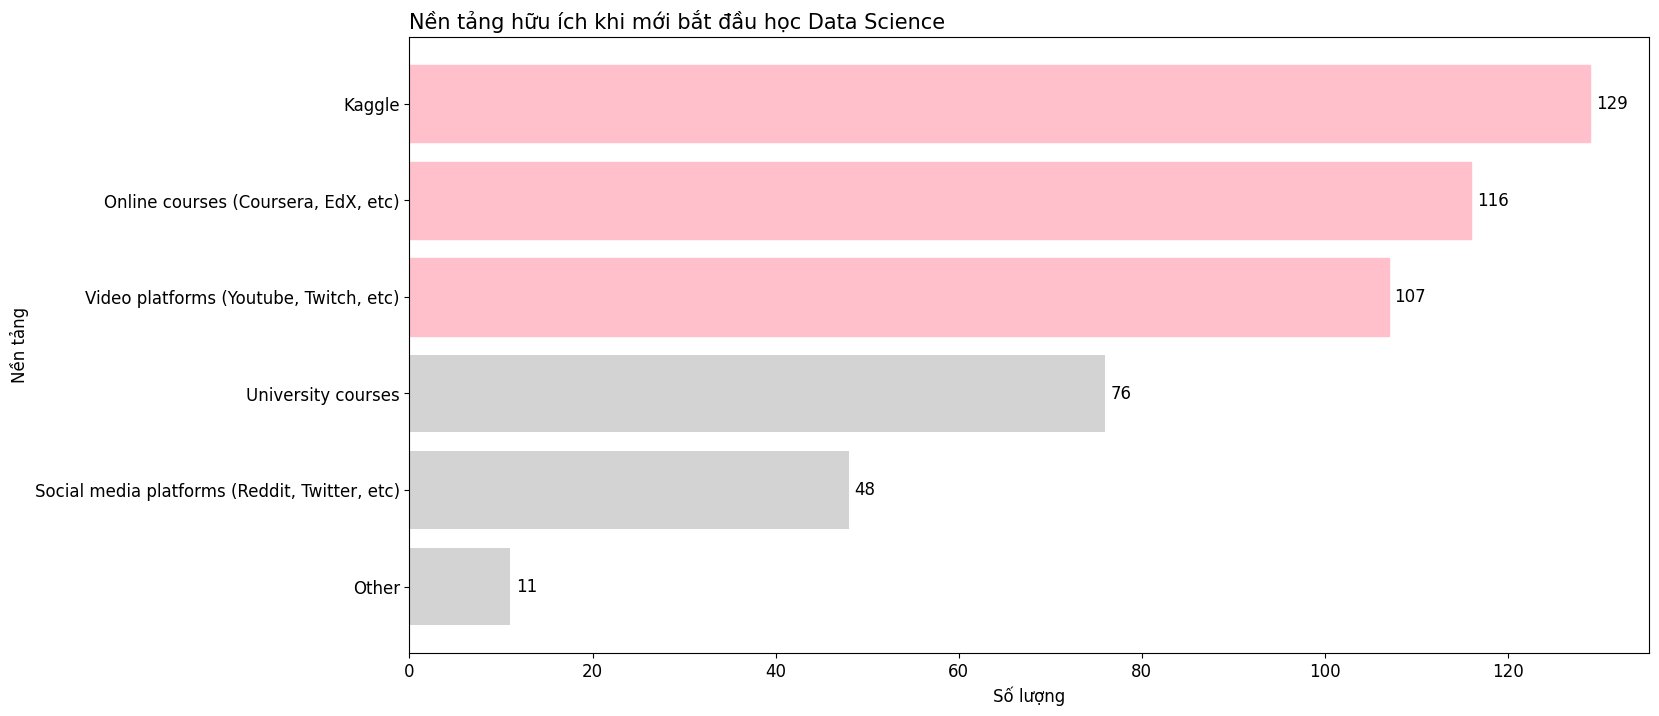

In [114]:
# x = platforms: Các nền tảng / ứng dụng được sử dụng khi mới bắt đầu học Data Science bởi người khảo sát tại Việt Nam
# y = platforms_value: Số lượng người sử dụng tương ứng

platforms = ['Kaggle', 'Online courses (Coursera, EdX, etc)', 
             'Video platforms (Youtube, Twitch, etc)',
             'University courses',
             'Social media platforms (Reddit, Twitter, etc)',
             'Other']

platforms_value = []
for i in vn_df_platform:
    platforms_value.append(vn_df_platform[i])

# Tạo biểu đồ cột ngang

plt.figure(figsize=(16, 8))
platform_plot = plt.barh(platforms, platforms_value, color="lightgrey")

# Đảo ngược trục y để các nền tảng có số người chọn nhiều nhất nằm ở phía trên

ax = plt.gca()
ax.invert_yaxis()
ax.bar_label(platform_plot, padding=4)

# Đặt top 3 nền tảng có số người chọn nhiều nhất màu hồng để làm nổi bật

for i in range (0,3):
    ax.get_children()[i].set_color("pink")

# Đặt tên cho trục x, trục y và tên biểu đồ

ax.set_ylabel("Nền tảng")
ax.set_xlabel("Số lượng")
plt.title("Nền tảng hữu ích khi mới bắt đầu học Data Science", loc="left", fontsize=15)

##### Phân tích

Qua biểu đồ cho thấy:
- Kaggle là nền tảng được lựa chọn hữu ích nhất khi mới bắt đầu học Data Science bởi những người khảo sát đang sinh sống tại Việt Nam với 129 lượt chọn. Tiếp đến là các khoá học online như Coursera, EdX,... với 116 lượt chọn. Thứ ba là các nền tảng xem video trực tuyến như Youtube, Twitch,... với 107 lượt chọn.
- Có thể thấy các nền tảng học online nổi tiếng, có uy tín là sự lựa chọn hàng đầu đối với những người khảo sát tại Việt Nam (Kaggle, Coursera, EdX). Những nền tảng này có những bài giảng về Data Science bài bản, chuyên nghiệp, đầu tư, có thể chia sẻ kiến thức với nhiều người ở khắp mọi nơi trên thế giới, cung cấp chứng chỉ online đảm bảo kiến thức, là một trong những yếu tố được các công ty xem xét. Kaggle còn là nơi lưu trữ rất nhiều dữ liệu, được kiểm tra và đảm bảo tin cậy, có thể sử dụng để thực hành các dự án về Data Science.
- Nằm trong thời đại internet phát triển rộng rãi, không quá bất ngờ khi những nền tảng online là những lựa chọn nhiều nhất khi mới bắt đầu học Data Science. Các nền tảng online mang lại sự thuận tiện cho người học, có thể học bất cứ lúc nào, bất cứ đâu, có thể xem lại bài giảng, trao đổi online,... Các khoá học tại trường đại học chỉ xếp thứ 4 với 76 lượt chọn.

### 1.2. Khảo sát phân chia theo nhóm học sinh/sinh viên và nhóm không phải
##### Lọc ra cột có liên quan để thực hiện phân tích

In [115]:
vn_df_student = vn_df[['Are you currently a student?', 'What products or platforms did you find to be most helpful when you first started studying data science?']].dropna()

In [116]:
is_student = vn_df_student['Are you currently a student?'].unique()
is_student

array(['Yes', 'No'], dtype=object)

##### Đếm các nền tảng xuất hiện và nhóm theo người khảo sát là/không là học sinh tại thời điểm khảo sát

In [117]:
student_count = vn_df_student.explode('What products or platforms did you find to be most helpful when you first started studying data science?').value_counts().reset_index(name='Freq')
student_count.drop(student_count[student_count['What products or platforms did you find to be most helpful when you first started studying data science?'] == 'None / I do not study data science'].index, inplace = True)
student_count

,Are you currently a student?,What products or platforms did you find to be most helpful when you first started studying data science?,Freq
0,Yes,"Kaggle (notebooks, competitions, etc)",84
1,Yes,"Video platforms (YouTube, Twitch, etc)",73
2,Yes,"Online courses (Coursera, EdX, etc)",71
3,Yes,University courses,56
4,No,"Kaggle (notebooks, competitions, etc)",45
5,No,"Online courses (Coursera, EdX, etc)",45
6,No,"Video platforms (YouTube, Twitch, etc)",34
7,Yes,"Social media platforms (Reddit, Twitter, etc)",31
8,No,University courses,20
9,No,"Social media platforms (Reddit, Twitter, etc)",17


##### Trực quan bằng biểu đồ cột

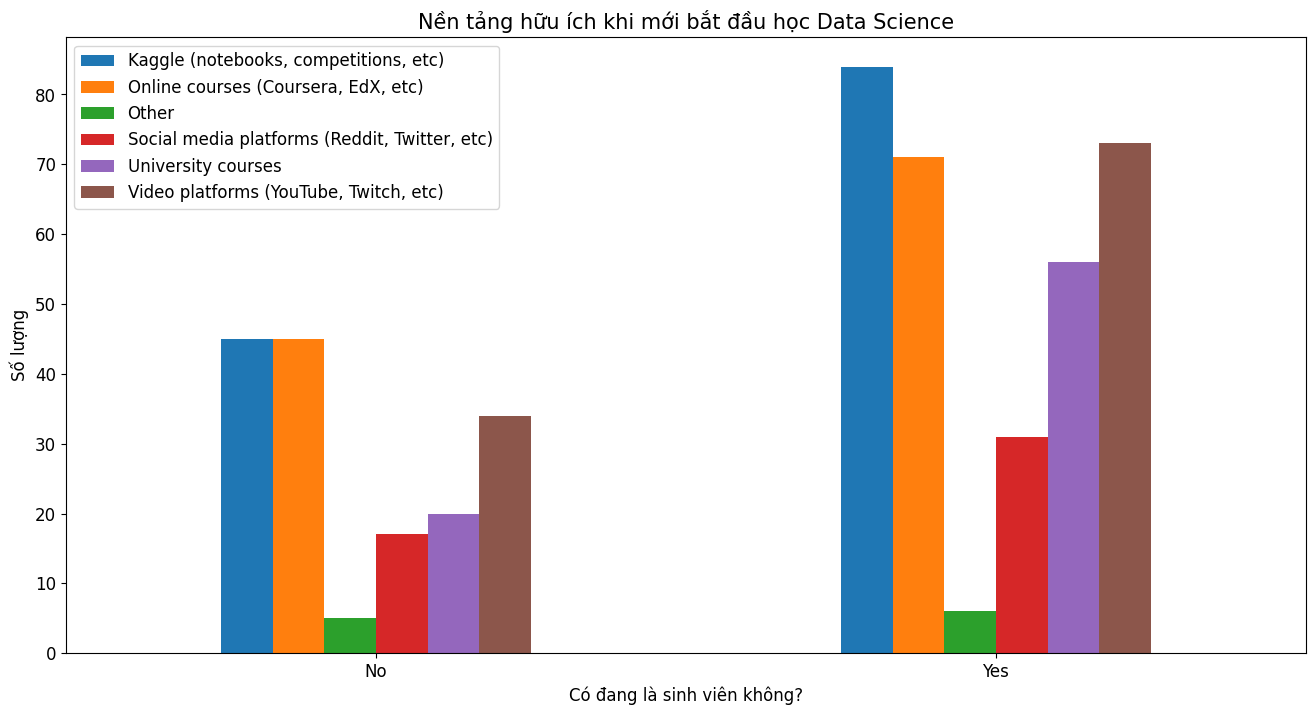

In [118]:
student_count.pivot_table('Freq', 'Are you currently a student?', 'What products or platforms did you find to be most helpful when you first started studying data science?').plot(kind='bar', figsize=(16,8))

# Đặt tên cho trục x, trục y và tên biểu đồ
ax = plt.subplot()
ax.set_ylabel("Số lượng")
ax.set_xlabel("Có đang là sinh viên không?")

plt.xticks(rotation=0)
plt.title("Nền tảng hữu ích khi mới bắt đầu học Data Science", fontsize=15)
plt.rc('font', size=12)
plt.legend()

C:\Users\yukih\AppData\Local\Temp\ipykernel_30112\1266101502.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  student_pivot = student_count.pivot('What products or platforms did you find to be most helpful when you first started studying data science?', 'Are you currently a student?', 'Freq')


Text(0.5, 1.0, 'Nền tảng hữu ích khi mới bắt đầu học Data Science')

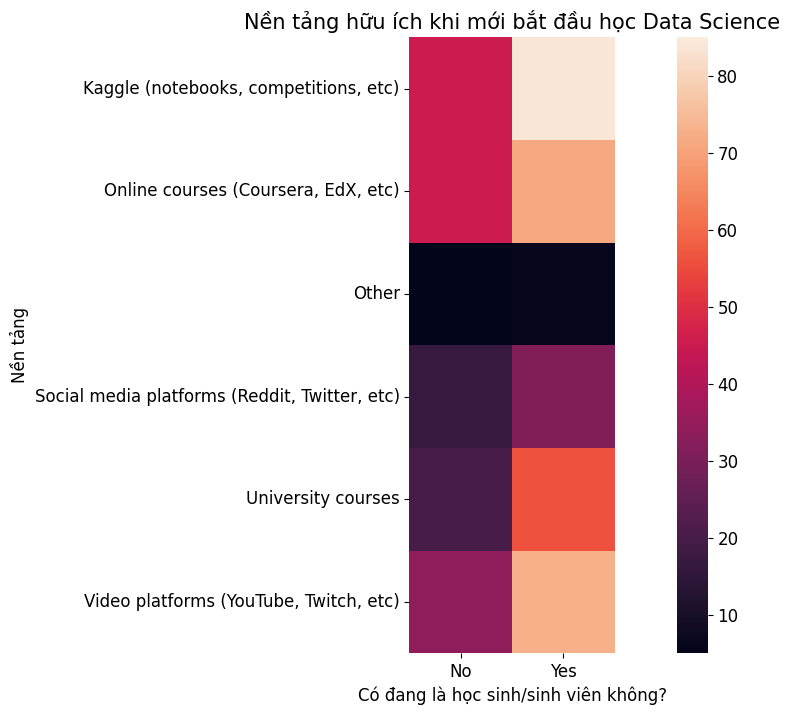

In [119]:
student_pivot = student_count.pivot('What products or platforms did you find to be most helpful when you first started studying data science?', 'Are you currently a student?', 'Freq')
student_pivot

plt.subplots(figsize=(16,8))
ax = sns.heatmap(student_pivot, square=True, vmin=5, vmax=85)
ax.set(xlabel="Có đang là học sinh/sinh viên không?", ylabel= "Nền tảng")
plt.title("Nền tảng hữu ích khi mới bắt đầu học Data Science", fontsize=15)

##### Phân tích

Qua biểu đồ cho thấy:
- Không có sự khác biệt nhiều giữa nhóm người đang là học sinh/sinh viên với nhóm người không là học sinh/sinh viên tại Việt Nam khi 3 lựa chọn nền tảng hữu ích khi mới bắt đầu học Data Science là Kaggle, các khoá học online (Coursera, EdX,...) và nền tảng video trực tuyến (YouTube, Twitch,...)
- Các nhóm người khảo sát đều cho rằng học qua các nền tảng trực tuyến chuyên nghiệp, bài bản là một sự lựa chọn hàng đầu. Cũng là nền tảng trực tuyến nhưng các trang mạng xã hội lại nhận được ít sự lựa chọn hơn rất nhiều. 

### 1.3. Khảo sát nền tảng người khảo sát hoàn thành khoá học Data Science

##### Lọc các cột có liên quan để thực hiện phân tích

In [137]:
vn_df_study = vn_df['On which platforms have you begun or completed data science courses?'].dropna()
vn_df_study = vn_df_study.explode().value_counts().to_dict()
del vn_df_study['None']

In [140]:
study_list = list(vn_df_study.keys())
study_list = [x.strip(' ') for x in study_list]

study_count = []
for i in vn_df_study:
    study_count.append(vn_df_study[i])

study_count_per = [round((val/count)*100,2) for val in study_count]

##### Trực quan bằng biểu đồ cột ngang

Text(0.0, 1.0, 'Nền tảng khi mới bắt đầu được sử dụng để hoàn thành khoá học Data Science')

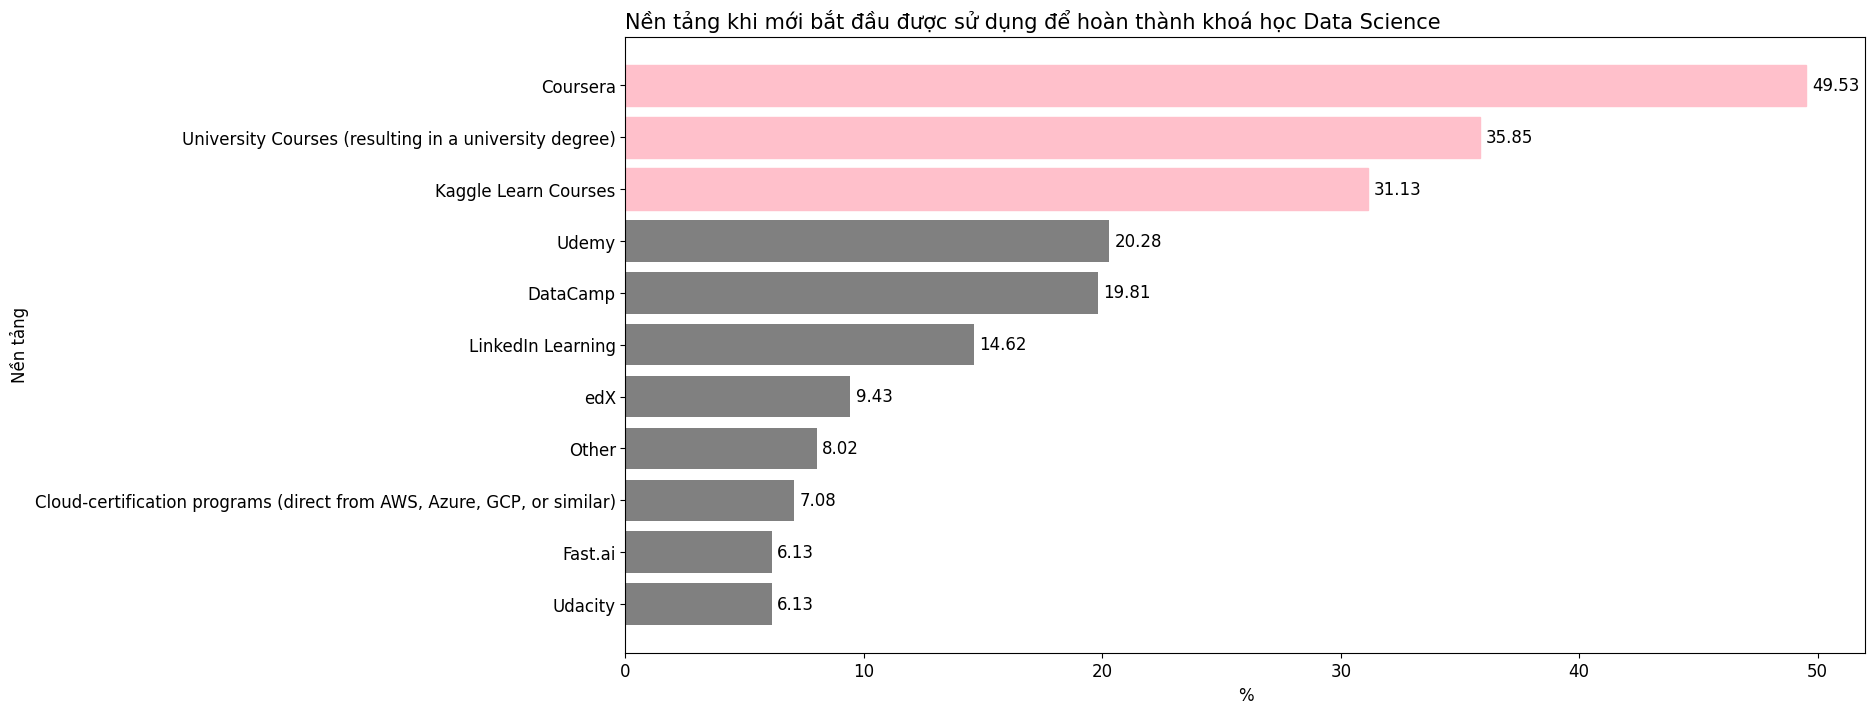

In [145]:
plt.figure(figsize=(16,8))

ide_plot = plt.barh(study_list, study_count_per, color="grey")

# Đảo ngược trục y để các nền tảng có số người chọn nhiều nhất nằm ở phía trên

ax = plt.gca()
ax.invert_yaxis()
ax.bar_label(ide_plot, padding=4)

# Đặt top 3 nền tảng có số người chọn nhiều nhất màu hồng để làm nổi bật

for i in range (0,len(study_list)):
    if study_count_per[i] > 30:
        ax.get_children()[i].set_color("pink")

# Đặt tên cho trục x, trục y và tên biểu đồ

ax.set_ylabel("Nền tảng")
ax.set_xlabel("%")
plt.title("Nền tảng khi mới bắt đầu được sử dụng để hoàn thành khoá học Data Science", loc="left", fontsize=15)

##### Phân tích

Qua biểu đồ có thể thấy:
- Coursera là nền tảng được dùng khi mới bắt đầu để hoàn thành khoá học Data Science nhiều nhất trong khảo sát với 49.53% người khảo sát lựa chọn, tiếp đến là các khoá học tại trường đại học với 35.85%, và thứ 3 là Kaggle Learn Courses với 31.13%
- Nhiều người khảo sát ở đây đã bắt đầu Data Science thông qua Coursera, một nền tảng nổi tiếng. Mặt khác, số người được tiếp cận Data Science thông qua các khoá học tại trường Đại học, hoặc theo học các ngành, chuyên ngành tại trường đại học cũng rất cao. Đây là cách tiếp cận truyền thống, bài bản và chuyên nghiệp.
- Kaggle Learn Courses, Udemy, LinkedIn Learning mặc dù ít được lựa chọn hơn Coursera nhưng đây cũng là những lựa chọn được nhiều người sử dụng để bắt đầu và hoàn thành khoá Data Science. Các chương trình chứng chỉ cloud, Fast.ai, Udacity là những lựa chọn chưa được phổ biến trong số người khảo sát tại Việt Nam.

<h3> 2. Ngôn ngữ lập trình nào thường được sử dụng bởi người được khảo sát? </h3>

##### Lọc ra các cột có liên quan để thực hiện phân tích

In [120]:
vn_df_lang = vn_df['What programming languages do you use on a regular basis?'].dropna()
#count = vn_df_lang.count()
vn_df_lang = vn_df_lang.explode().value_counts().to_dict()

##### Xoá đi giá trị không có ích trong việc phân tích

In [121]:
del vn_df_lang['None']

##### Tính phần trăm các ngôn ngữ được chọn

In [122]:
lang_list = list(vn_df_lang.keys())

lang_list_count = []
for i in vn_df_lang:
    lang_list_count.append(vn_df_lang[i])

total = np.sum(lang_list_count)
lang_list_count_percentage = [round((val/total)*100,2) for val in lang_list_count]

##### Trực quan bằng biểu đồ tròn

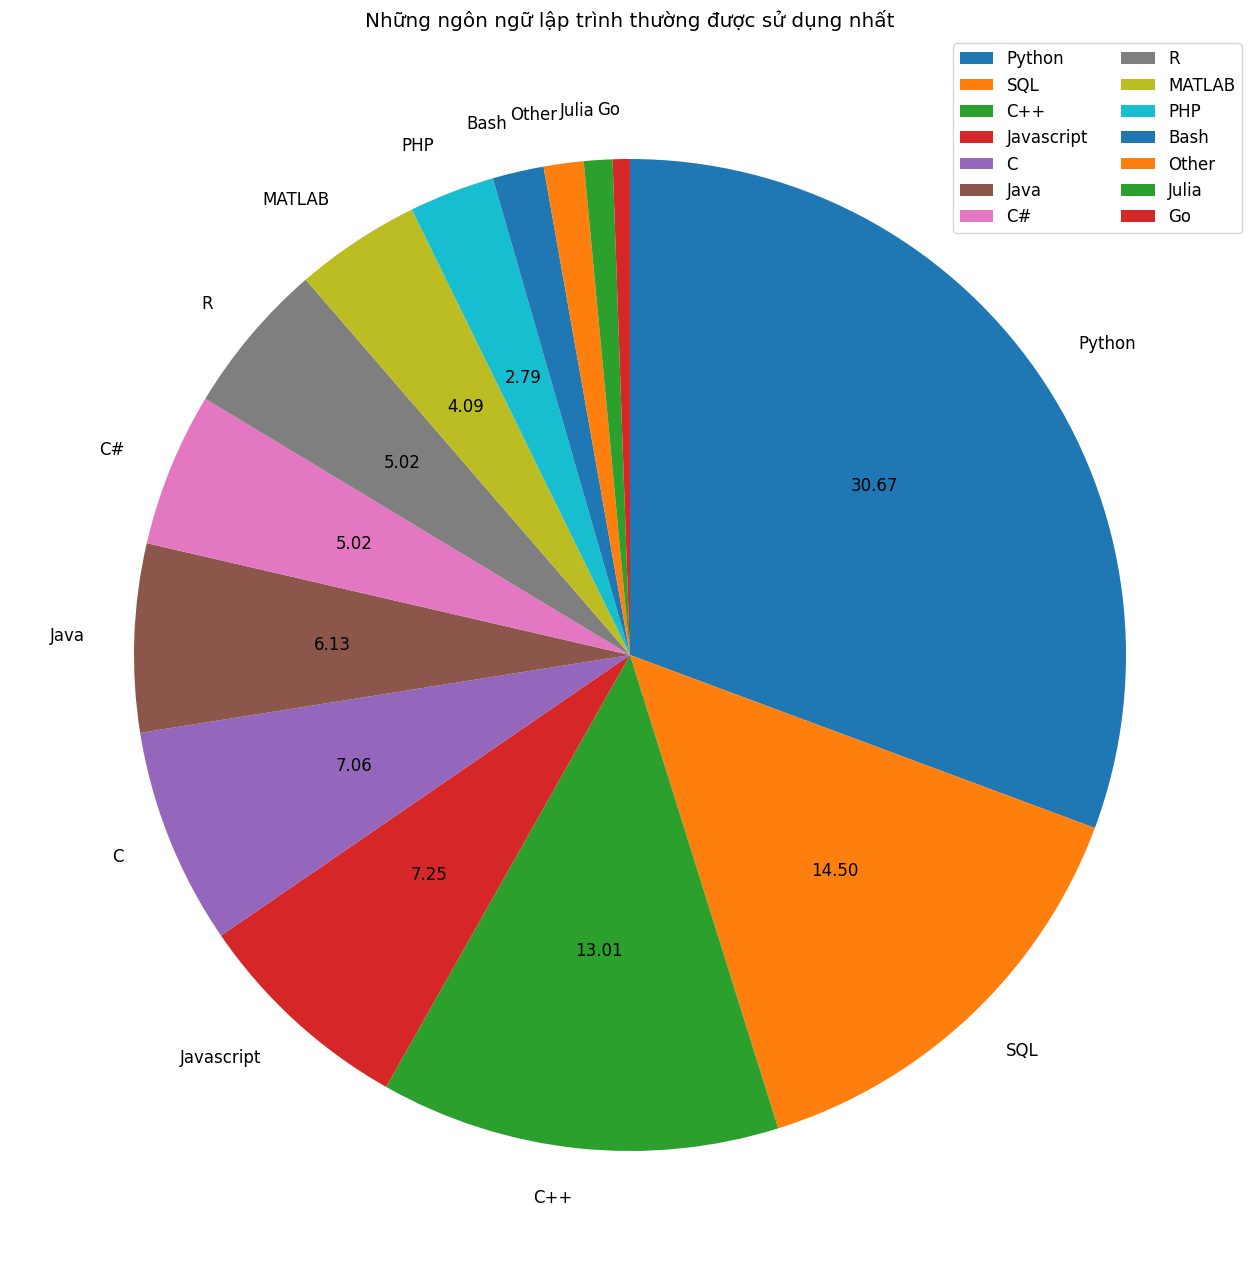

In [123]:
def my_autopct(pct):
    return ('%.2f' % pct) if pct > 2 else ''

plt.figure(figsize=(16, 24))

plt.pie(lang_list_count_percentage, startangle=90, labels=lang_list, autopct=my_autopct, counterclock=False)
plt.title("Những ngôn ngữ lập trình thường được sử dụng nhất")
plt.legend(ncol=2, loc=1)

##### Tính phần trăm các ngôn ngữ được chọn trên tổng số người khảo sát

In [124]:
lang_list_count_per = [round((val/count)*100,2) for val in lang_list_count]

##### Trực quan bằng biểu đồ cột ngang

Text(0.0, 1.0, 'Những ngôn ngữ lập trình thường được sử dụng nhất')

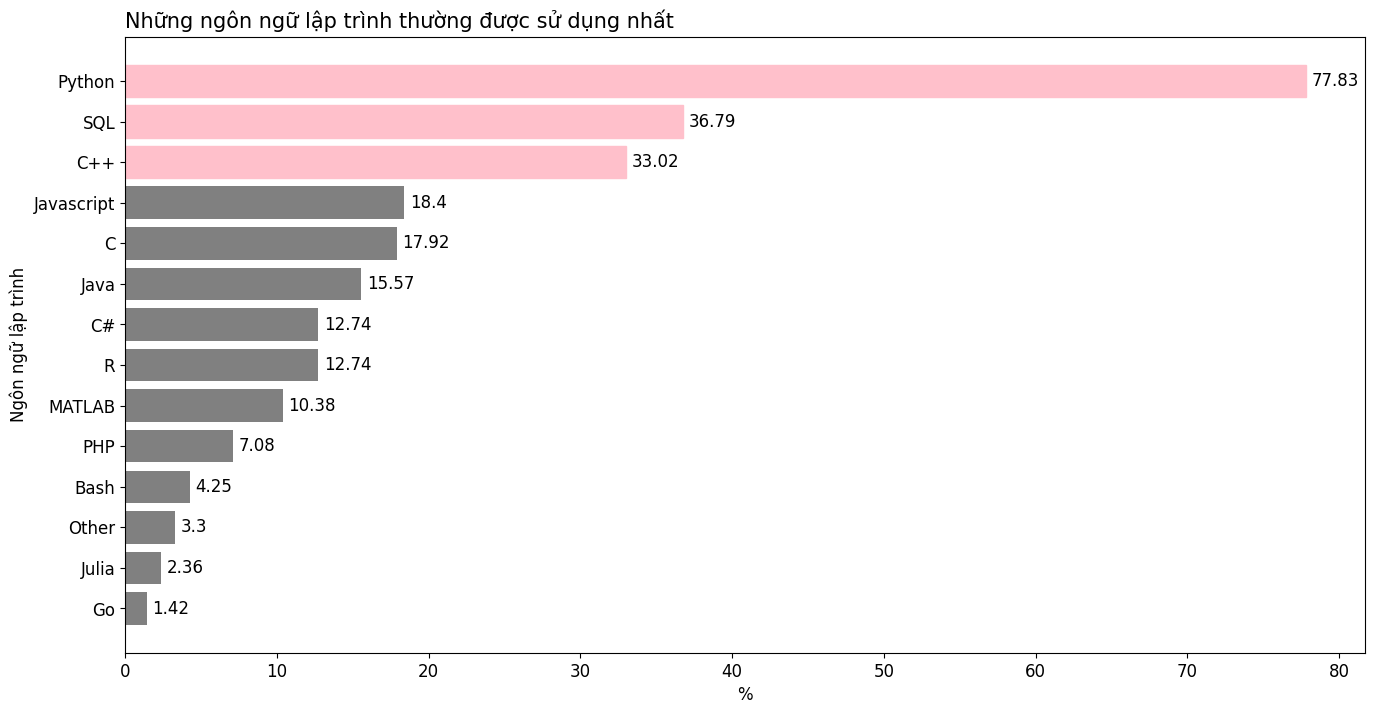

In [125]:
plt.figure(figsize=(16,8))

lang_plot = plt.barh(lang_list, lang_list_count_per, color="grey")

# Đảo ngược trục y để các nền tảng có số người chọn nhiều nhất nằm ở phía trên

ax = plt.gca()
ax.invert_yaxis()
ax.bar_label(lang_plot, padding=4)

# Đặt top 3 nền tảng có số người chọn nhiều nhất màu hồng để làm nổi bật

for i in range (0,3):
    ax.get_children()[i].set_color("pink")

# Đặt tên cho trục x, trục y và tên biểu đồ

ax.set_ylabel("Ngôn ngữ lập trình")
ax.set_xlabel("%")
plt.title("Những ngôn ngữ lập trình thường được sử dụng nhất", loc="left", fontsize=15)

##### Phân tích

Qua biểu đồ cho thấy:
- Python là ngôn ngữ lập trình được nhiều người khảo sát đang sinh sống tại Việt Nam sử dụng thường xuyên nhất. Tiếp đến là SQL và C++.
- Khi nói về Data Science, Python vẫn được nhắc đến nhiều nhất vì tính phổ biến, được sử dụng nhiều và phù hợp với Data Science. SQL cũng là một ngôn ngữ phổ biến được sử dụng để truy vấn dữ liệu,...

<h3> 3. Khảo sát về IDE nào thường được sử dụng </h3>

##### Lọc ra các cột có liên quan để thực hiện phân tích

In [126]:
vn_df_ide = vn_df['Which of the following integrated development environments (IDE\'s) do you use on a regular basis?'].dropna()
vn_df_ide = vn_df_ide.explode().value_counts().to_dict()
del vn_df_ide['None']

In [142]:
ide_list = list(vn_df_ide.keys())
ide_list = [x.strip(' ') for x in ide_list]

ide_count = []
for i in vn_df_ide:
    ide_count.append(vn_df_ide[i])

ide_count_per = [round((val/count)*100,2) for val in ide_count]

##### Trực quan bằng biểu đồ cột ngang

Text(0.0, 1.0, 'IDE thường được sử dụng nhất')

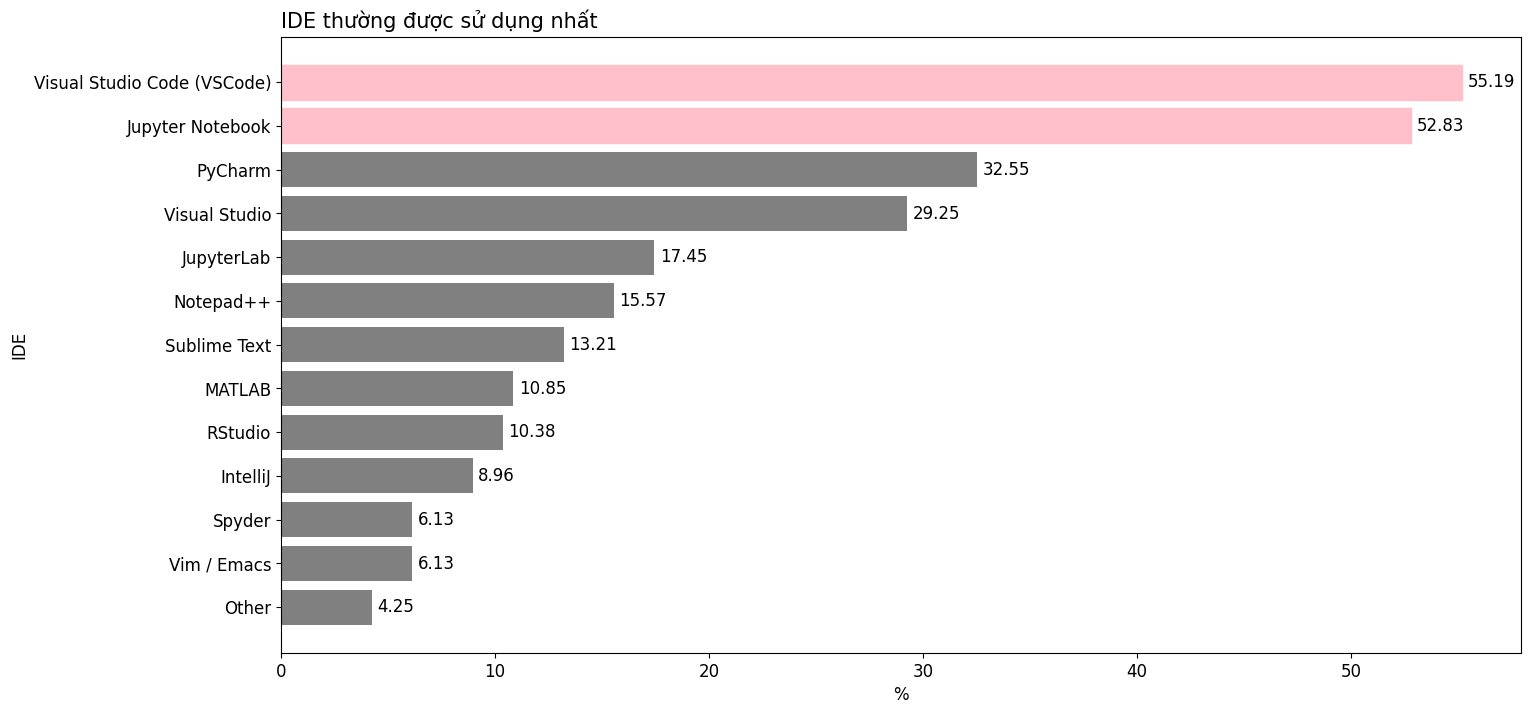

In [144]:
plt.figure(figsize=(16,8))

ide_plot = plt.barh(ide_list, ide_count_per, color="grey")

# Đảo ngược trục y để các nền tảng có số người chọn nhiều nhất nằm ở phía trên

ax = plt.gca()
ax.invert_yaxis()
ax.bar_label(ide_plot, padding=4)

# Đặt top 3 nền tảng có số người chọn nhiều nhất màu hồng để làm nổi bật

for i in range (0,len(ide_list)):
    if ide_count_per[i] > 50:
        ax.get_children()[i].set_color("pink")

# Đặt tên cho trục x, trục y và tên biểu đồ

ax.set_ylabel("IDE")
ax.set_xlabel("%")
plt.title("IDE thường được sử dụng nhất", loc="left", fontsize=15)

##### Phân tích

Qua biểu đồ cho thấy:
- Visual Studio Code và Jupyter Notebook là 2 IDE phổ biến nhất khi thường được sử dụng bởi hơn 50% số người khảo sát tại Việt Nam.
- Vim/Emacs, Spyder, IntelliJ là 3 trong số IDE ít được sử dụng thường xuyên khi chưa đến 10% số người khảo sát lựa chọn.